<a href="https://colab.research.google.com/github/smuratsirin/Market_Design_Lit_Review/blob/main/Electricity_Market_Design_Literature_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install litstudy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00
  Created wheel for litstudy: filename=litstudy-1.0.6-py3-none-any.whl size=50024 sha256=e123be3b630f5018cb7b2d2855bd9c6a6fa62aa1614aa314e59ebd3f29de301d
  Stored in directory: /root/.cache/pip/wheels/72/97/1c/6327aca7

In [3]:
import pandas as pd
import litstudy
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

# Load your data
wos = litstudy.load_csv('/content/sample_data/wos_lit_review_colab.csv',
                        title_field = "title",
                        authors_field = "authors",
                        abstract_field = "abstract",
                        date_field = "publication_year",
                        citation_field = None)

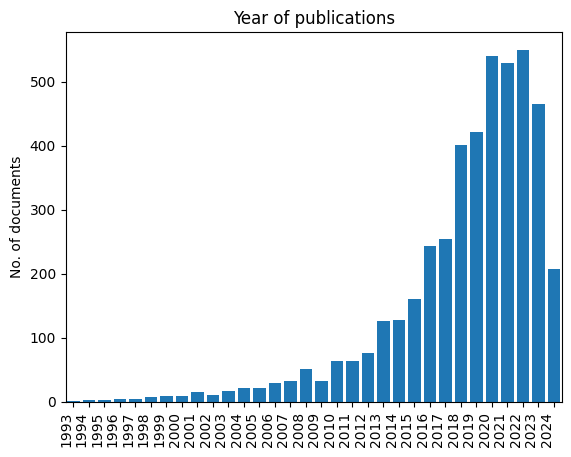

In [5]:
litstudy.plot_year_histogram(wos, vertical=True);

In [6]:
corpus = litstudy.build_corpus(wos, ngram_threshold=0.8)

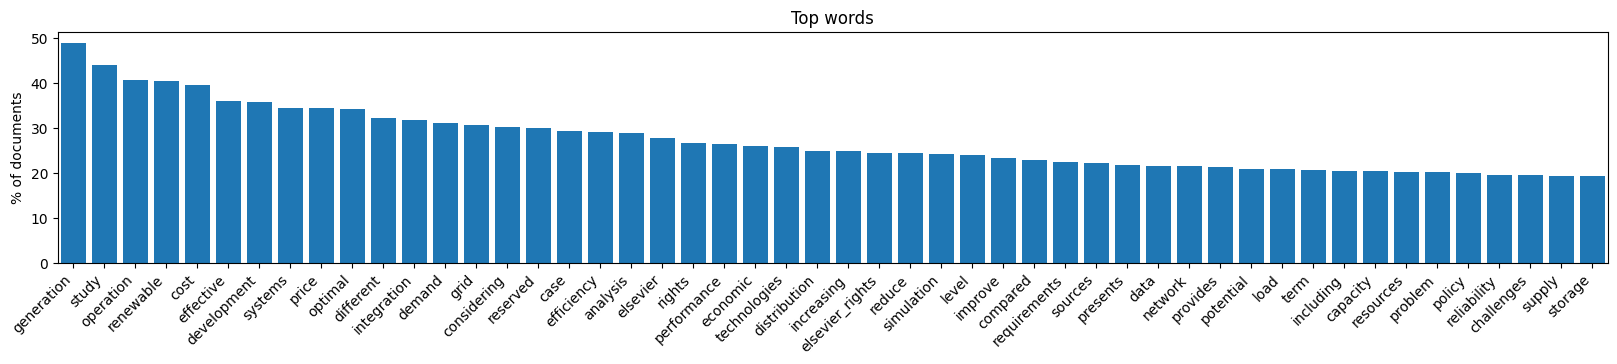

In [7]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);

In [11]:
num_topics = 30
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

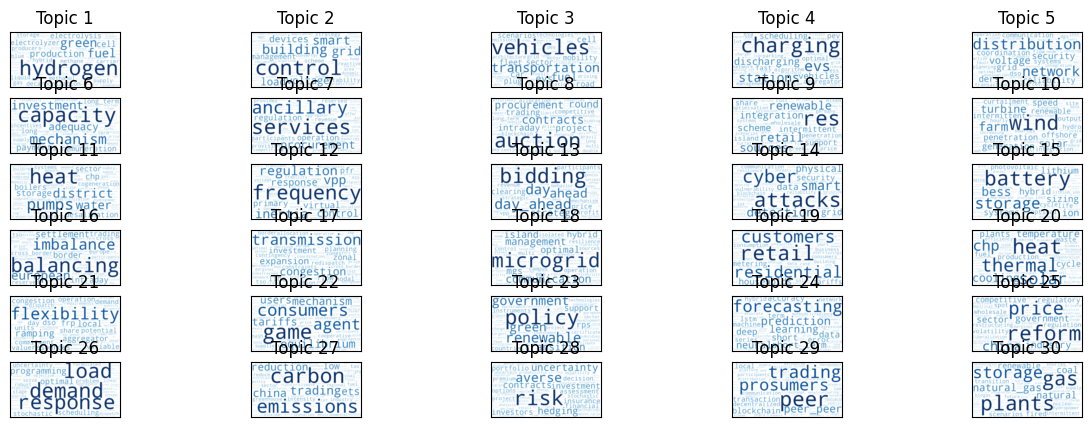

In [12]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

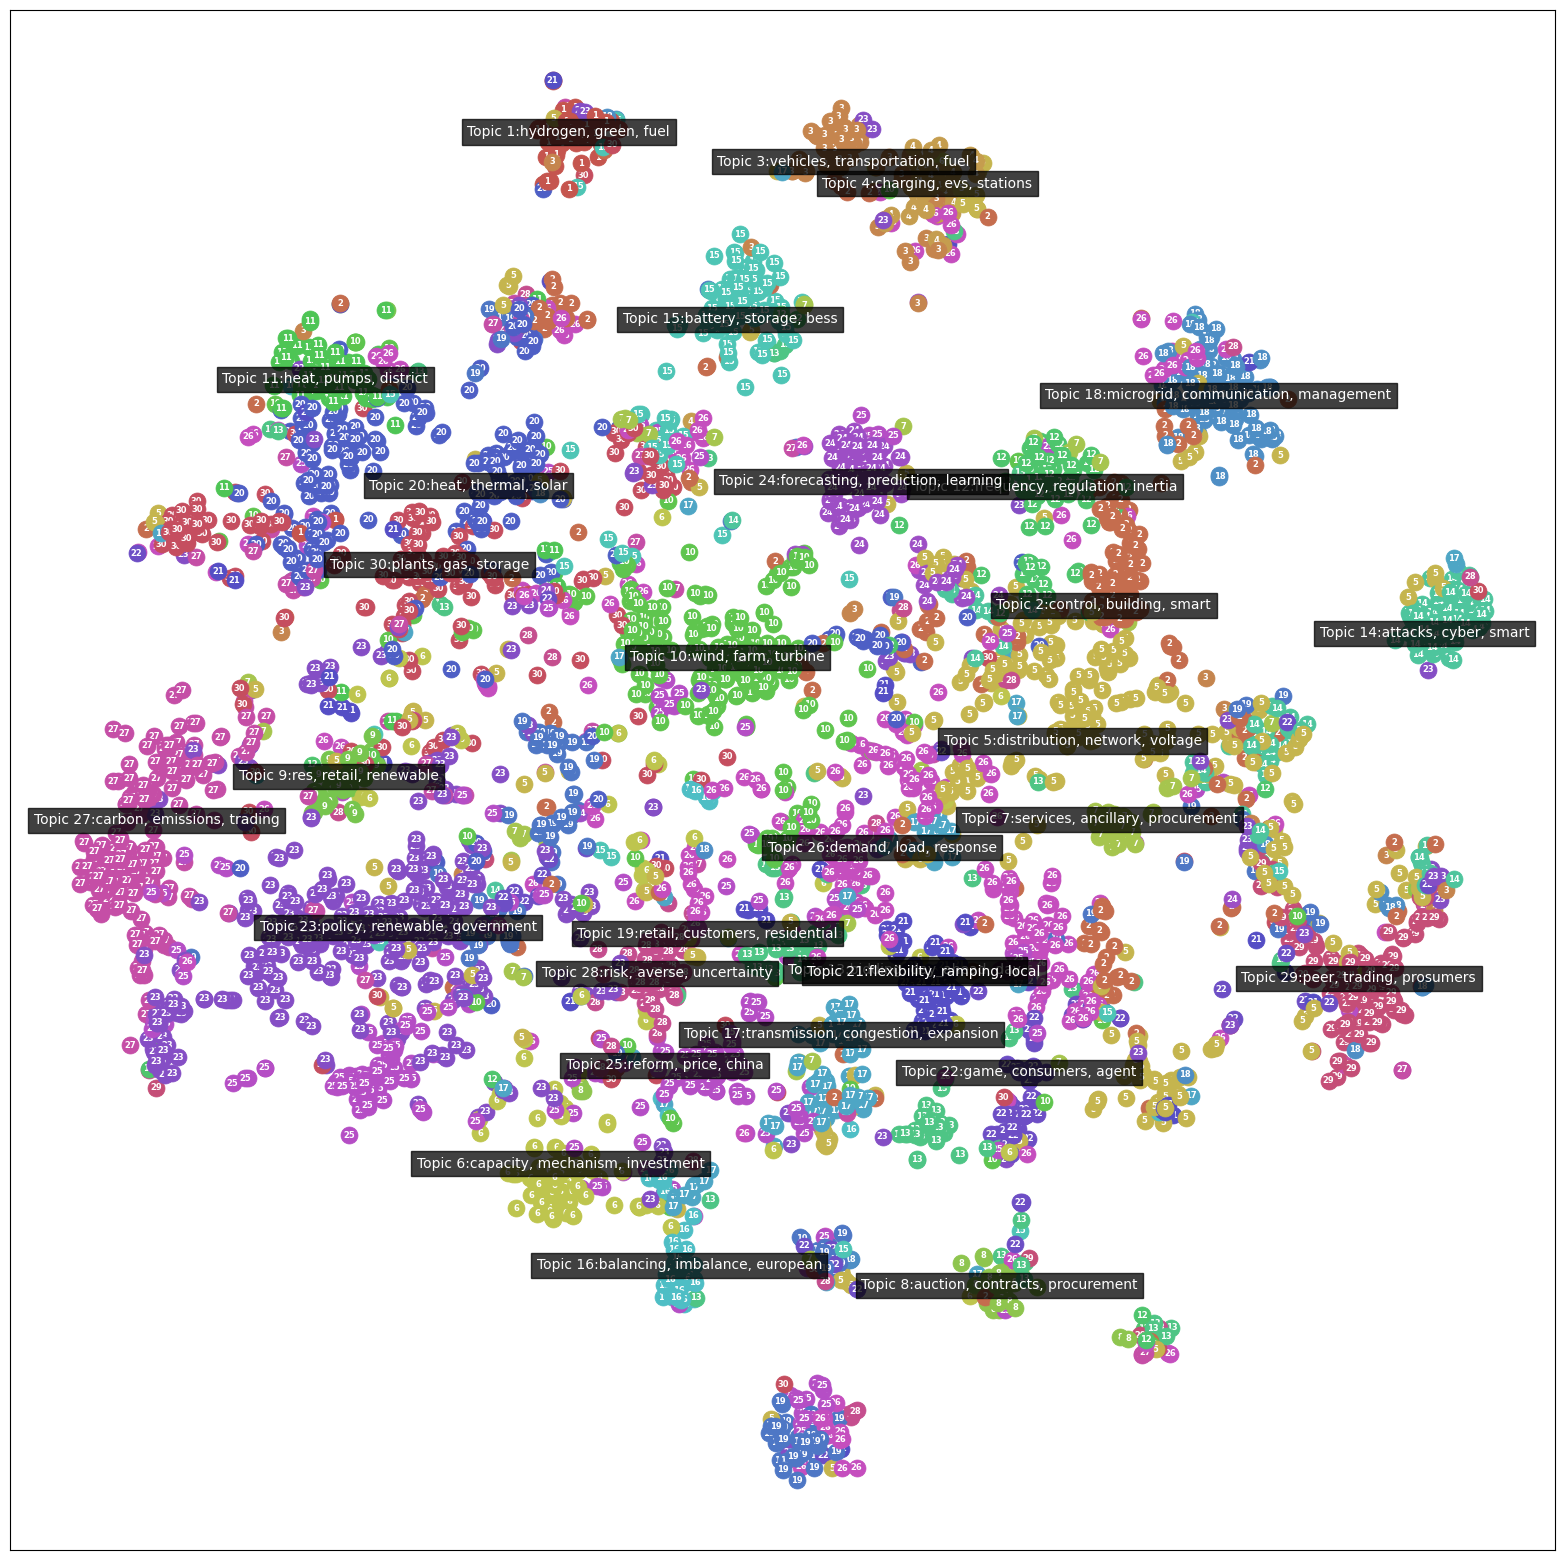

In [13]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);